### Deadline 27.06.2022

# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('data.csv',index_col=0)
df.shape

(10000, 3)

Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


<AxesSubplot:xlabel='x1', ylabel='x2'>

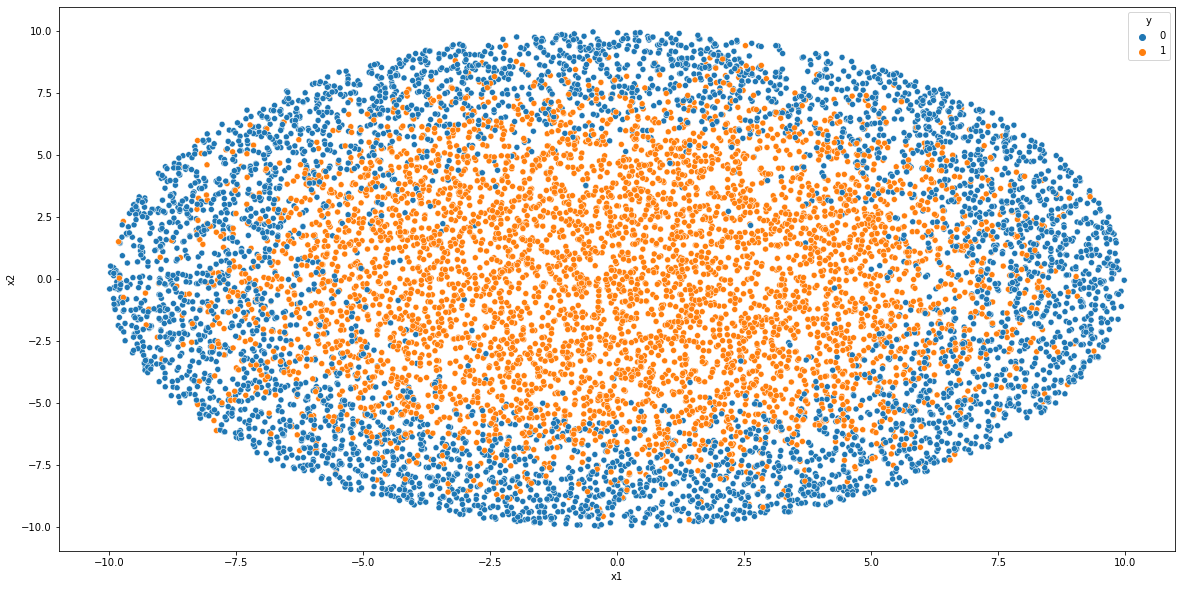

In [6]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [4]:
true_class_y = np.array(df['y'].value_counts(normalize=True).sort_index().tolist())
np.tile(true_class_y, len(df)).reshape(len(df), 2).shape

(10000, 2)

In [5]:
divid_defolt.argmax(axis=1)

NameError: name 'divid_defolt' is not defined

In [9]:
# КОД В ЭТОЙ ЯЧЕЙКИ ВЗЯТ ИЗ СЕМИНАРА...

from sklearn.metrics import log_loss

# рассмотрим доли классов
true_class_y = np.array(df['y'].value_counts(normalize=True).sort_index().tolist())

# растянем наши доли по всем ответам
divid_defolt = np.tile(true_class_y, len(df)).reshape(len(df), 2)

print('Константный прогноз, - точность')
yy = df['y']
print(f'Точность нашей модели {accuracy_score(divid_defolt.argmax(axis=1), yy.to_numpy())}')

Константный прогноз, - точность
Точность нашей модели 0.5097


In [10]:
# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)

Точность нашей модели 0.5803030303030303


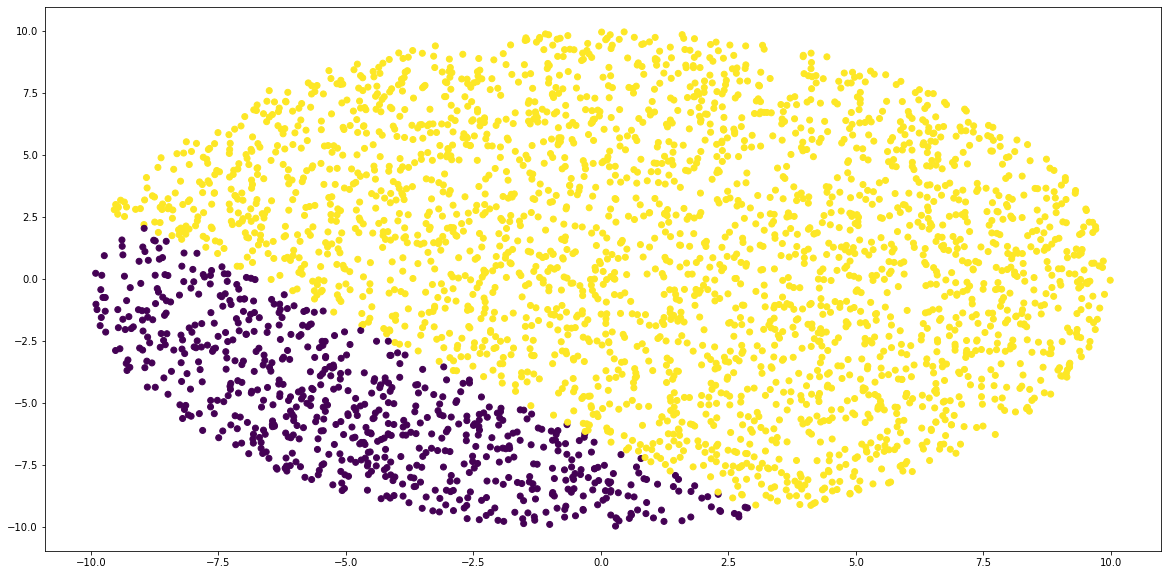

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

#########################################
# Ваш код для Логистической регрессии

predict_logit =  lr.predict(X_test)
predict_log_proba = lr.predict_log_proba(X_test)

#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_logit)
plt.show()


Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Точность нашей модели 0.8384848484848485


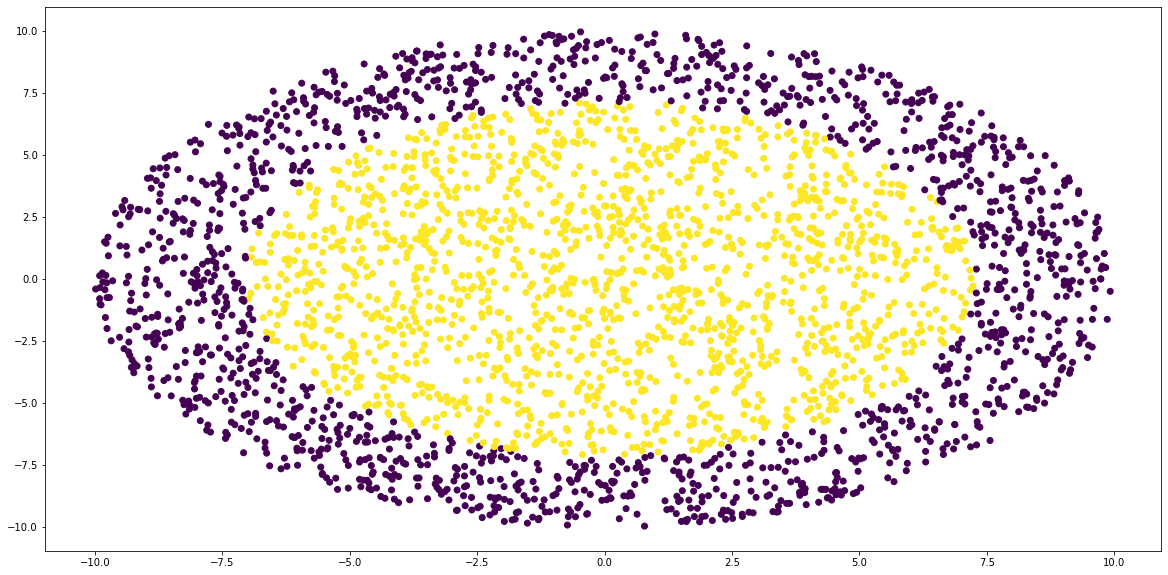

In [17]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['new_feature_1'] = df_new['x1']**2 + df_new['x2']**2

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1']],
                                                                    df_new['y'], test_size = 0.33)


lr.fit(X_train_new, y_train_new)
predict_logit =  lr.predict(X_test_new)
predict_log_proba = lr.predict_log_proba(X_test_new)

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit, y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_logit)
plt.show()

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

Точность нашей модели 0.7678787878787878


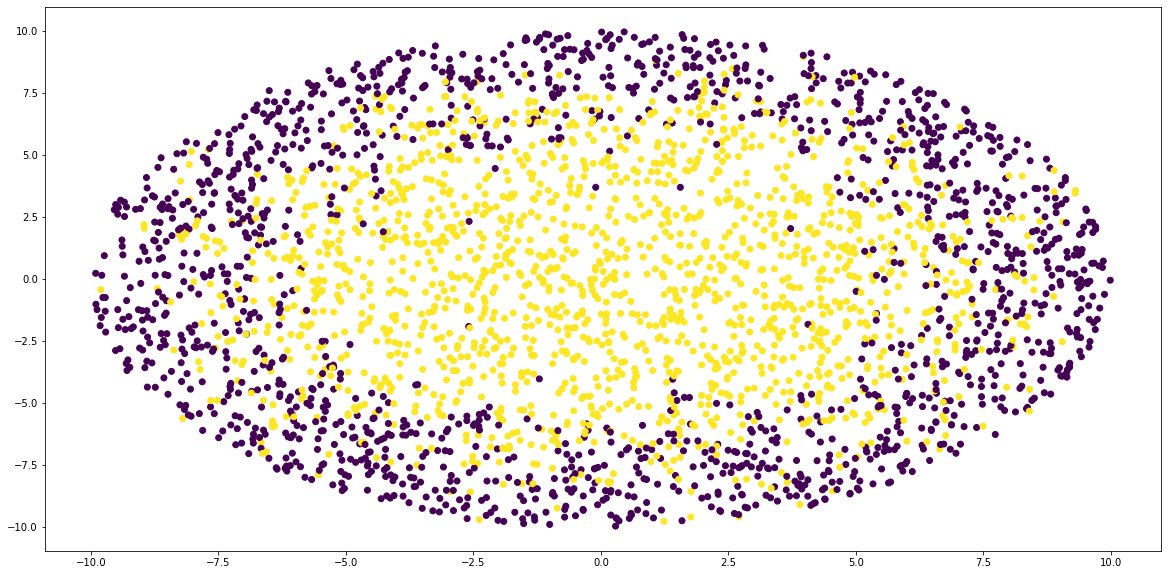

In [18]:
from sklearn.tree import DecisionTreeClassifier


#########################################
# Ваш код

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

predict_tree = dt.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = dt.predict_proba(X_test)


#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree)
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Точность нашей модели 0.813939393939394


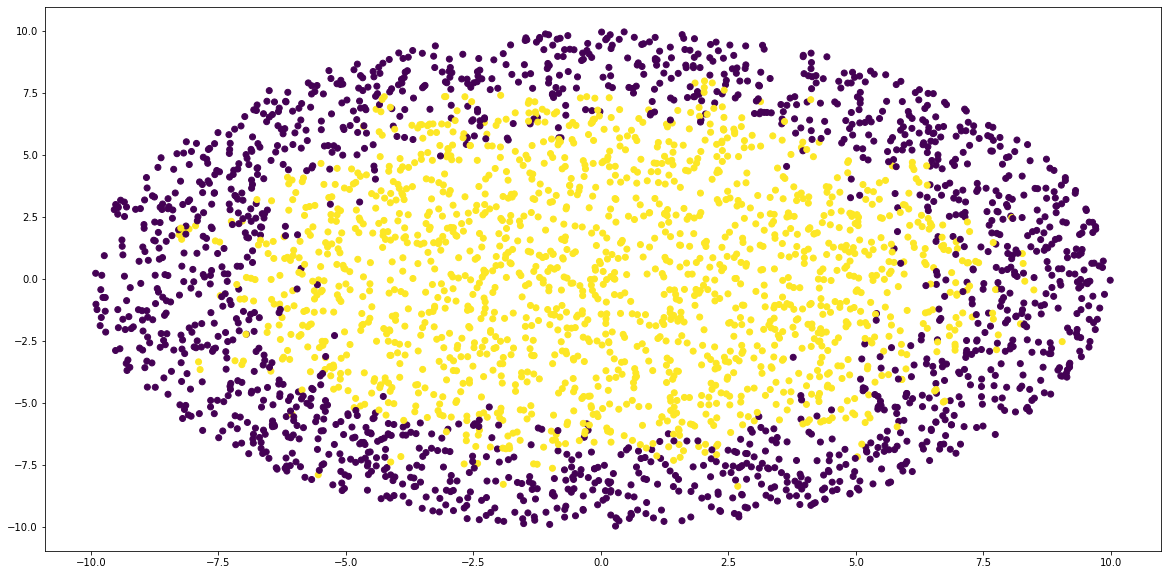

In [19]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

predict_forest = rf.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = rf.predict_proba(X_test)

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest)
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадку и копипастим все, что мы там видим! (можно для убыстрения процесса добавить callback с ранней остановкой)

In [85]:
# !pip install --force-reinstall tensorflow

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
# Подгружаем tensorflow 
import tensorflow as tf
import tensorflow.keras as keras

print(tf.__version__)
print(keras.__version__) 

from tensorflow.keras import layers as L         # Уже готовые слои для моделей
from tensorflow.keras.models import Sequential   # Специальный класс для склеивания слоёв
from tensorflow.keras.models import Model        # Альтернативный класс для склейки слоёв
import tensorflow.keras.optimizers as opt        # Разные оптимизационные алгоритмы :3 

2.9.1
2.9.0


In [40]:
X_train.shape

(6700, 2)

In [46]:
from tensorflow.keras.metrics import Accuracy

def get_new_model( ):
    acc = Accuracy()

    ###########################################################

    model = Sequential(name = 'A')  # модели можно дать имя!
    
    # Добавляем в нашу модель первый слой из 25 нейронов
    model.add(L.Dense(5, input_dim = X_train.shape[1], kernel_initializer='random_normal'))

    # Добавляем функцию активации на первый слой 
    model.add(L.Activation('sigmoid'))

    # Добавляем ещё один слой из 5 нейронов
    model.add(L.Dense(5, kernel_initializer='random_normal'))
    model.add(L.Activation('sigmoid'))

    # На выходе мы должны получить вероятности того, что объект относится к разным классам 
    # Сделать такое преобразование позволяет softmax как функция активации
    # На выход будет идти 4 вероятности по числу классов
    model.add(L.Dense(2, activation='softmax', kernel_initializer = 'random_normal'))
    
    ###########################################################
    
    # В качестве оптимизации будем использовать Adam
    optimizer = opt.Adam(lr=1e-3)

    # Собираем модель
    model.compile(loss = 'categorical_crossentropy', 
                  metrics=['acc'], 
                  optimizer=optimizer)
    
    return model

In [47]:
model = get_new_model( )

In [48]:
model.summary()

Model: "A"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 15        
                                                                 
 activation_11 (Activation)  (None, 5)                 0         
                                                                 
 dense_16 (Dense)            (None, 5)                 30        
                                                                 
 activation_12 (Activation)  (None, 5)                 0         
                                                                 
 dense_17 (Dense)            (None, 2)                 12        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [49]:
from tensorflow.keras.utils import to_categorical
to_categorical(y_train)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [56]:
hist = model.fit(X_train, to_categorical(y_train), validation_split=0.1, epochs=80, verbose=1)

Epoch 1/80
189/189 [==============================] - 0s 2ms/step - loss: 0.3642 - acc: 0.8408 - val_loss: 0.3611 - val_acc: 0.8224
Epoch 2/80
189/189 [==============================] - 0s 2ms/step - loss: 0.3644 - acc: 0.8385 - val_loss: 0.3596 - val_acc: 0.8373
Epoch 3/80
189/189 [==============================] - 0s 2ms/step - loss: 0.3645 - acc: 0.8408 - val_loss: 0.3591 - val_acc: 0.8299
Epoch 4/80
189/189 [==============================] - 0s 2ms/step - loss: 0.3648 - acc: 0.8371 - val_loss: 0.3601 - val_acc: 0.8194
Epoch 5/80
189/189 [==============================] - 0s 2ms/step - loss: 0.3646 - acc: 0.8378 - val_loss: 0.3591 - val_acc: 0.8299
Epoch 6/80
189/189 [==============================] - 0s 2ms/step - loss: 0.3644 - acc: 0.8403 - val_loss: 0.3595 - val_acc: 0.8403
Epoch 7/80
189/189 [==============================] - 0s 2ms/step - loss: 0.3641 - acc: 0.8393 - val_loss: 0.3599 - val_acc: 0.8164
Epoch 8/80
189/189 [==============================] - 0s 2ms/step - loss: 0.

189/189 [==============================] - 0s 2ms/step - loss: 0.3644 - acc: 0.8395 - val_loss: 0.3595 - val_acc: 0.8299
Epoch 63/80
189/189 [==============================] - 0s 2ms/step - loss: 0.3643 - acc: 0.8380 - val_loss: 0.3586 - val_acc: 0.8284
Epoch 64/80
189/189 [==============================] - 0s 2ms/step - loss: 0.3643 - acc: 0.8390 - val_loss: 0.3581 - val_acc: 0.8343
Epoch 65/80
189/189 [==============================] - 0s 2ms/step - loss: 0.3639 - acc: 0.8400 - val_loss: 0.3583 - val_acc: 0.8284
Epoch 66/80
189/189 [==============================] - 0s 2ms/step - loss: 0.3644 - acc: 0.8400 - val_loss: 0.3587 - val_acc: 0.8284
Epoch 67/80
189/189 [==============================] - 0s 2ms/step - loss: 0.3640 - acc: 0.8395 - val_loss: 0.3599 - val_acc: 0.8373
Epoch 68/80
189/189 [==============================] - 0s 2ms/step - loss: 0.3646 - acc: 0.8381 - val_loss: 0.3611 - val_acc: 0.8224
Epoch 69/80
189/189 [==============================] - 0s 2ms/step - loss: 0.3646

104/104 [==============================] - 0s 1ms/step
Точность нашей модели 0.843030303030303


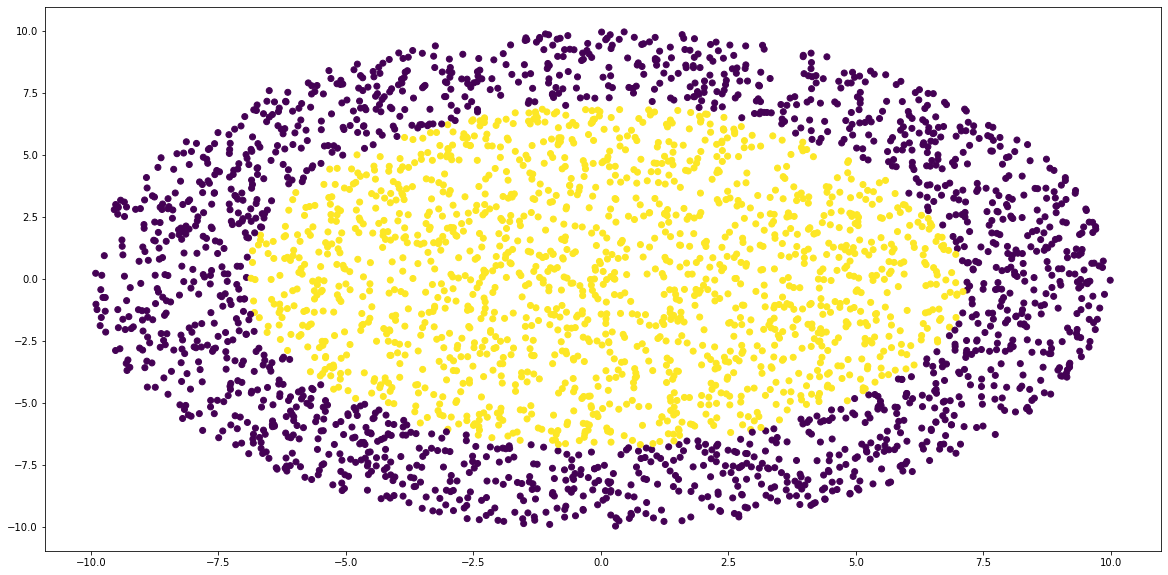

In [57]:
#########################################
# Ваш код

predict_neural = model.predict(X_test)
predict_classes = predict_neural.argmax(axis=1)

print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_classes)
plt.show()

На этом наше приключение сегодня закончилось. Вопросы максимально желательны :)